### Decision Trees

1) Decision-tree algorithm falls under the category of supervised learning algorithms. <br>
2) Decision Tress is used for both classification and regression. <br>
3) <b>A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).</b><br>
4) It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.<br>


#### Components of Decision Tree
1) <b>Root node</b> - Node at the top of tree is the root node. In the beginning, the entire data is present at this node, ready to be splitted based on some testing criterion.<br>
2) <b>Internal Node</b> - Splitting happens at internal node(besides root node). The data is further categorized based on te testing criterion<br>
3) <b>Leaf Nodes</b> - Node are no longer splitted beyond the leaf nodes. The decision of the tree based on ddiifernt branches is finally represented on the leaf node<br>
4) <b>Branch</b> - Internal node along with either its leaf nodes or sub-branches is refereed to as a branch

#### Problem Statemnet - Whether a customer will buy the car or not

Independent features = Mileage, Color, Make(brand), Model(year_built)<br>
Target Variable - Buy or Dont_Buy

Assumptions - 100 rows<br>
1st split - If Color of Car red? Yes(65) No(35)<br>
LeftBranch of 1st split (Yes) - 65<br>
2nd Split of left branch - Is Model built after 2010? Yes(40)<b>[BUY]</b> or No(25)<br>
RightBranch of 2nd split (No) - 25<br>
3rd Split of left branch - Is Mileage<50000km ? Yes(11)<b>[BUY]</b> or No(14)<b>[DONT BUY]</b>

RightBranch of 1st split (No) - 35<br>
4th split - If Color of Car yellow? Yes(28) No(7)<b>[DONT BUY]</b><br>
LeftBranch of 4th split (Yes) - 28<br>
5th split - If Makers of the Car is Ferrai? Yes(16)<b>[BUY]</b> No(12)<b>[DONT BUY]</b><br>

<p align="center">
  <img  src="https://drive.google.com/uc?id=1MA_qWocRMlEjb5Ly576JjCS4XOFCFqgc">
</p>

### How to decide the feature for splitting at root node or internal nodes?
1) Statistical measures like <b>Entropy,Information Gain and Gini Index</b> are used to decide the features(columns) for splitting.

2) Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure.

3) Gini 

<p align="center">
  <img  src="https://drive.google.com/uc?id=1KePuS5MSC5nLQCuhNjRimMI8LkKqO-qa">
</p>

where $ P_{i} $  = Probability of the different categories of the target variable


#### Note
1) The feature(column) with the lowest gini index is selected as the criterion for splitting<br>
2) The process of splitting continues, till the depth of the tree<br>

4) Entropy
<p align="center">
  <img  src="https://drive.google.com/uc?id=1rOI05rG5R0KcSMikQ9v7qp0LB3cRn8kf">
</p>

where $ P_{i} $  = Probability of the different categories of the target variable<br>
n is the number of categories in the target variable

#### Note
1) After computing entropy for each feature, <b>Informtaion Gain</b> is computed.<br>
2) <b>Information Gain = Entropy(Target variable) - Entropy(Target variable writh respect to a feature)</b><br>
3) The feature(column) with the highest Information Gain is selected as the criterion for splitting a node<br> 
4) The feature with the lowest entropy is selected as the criterion for splitting<br>
5) The process of splitting continues, till the depth of the tree

### HyperParamters for Decision Trees

1) <b>criterion </b>- 'gini', 'entropy'

2) <b>max_depth</b> - Defines max-depth of Decision Tree.

3) <b>min_samples_split</b> - Min number of samples beyond which there will be no splitting

#### Limitations of Decision Tree
1) It suffers from Overfitting (high Training Score, low Testing Score)

Overfitting  - Model with high varaince and low bias rsulting into high Training Score and low testing score

In [ ]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# pandas is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt

#### Importing the dataset

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
input_feat = iris.data    # Indepenndet features
target_feat = iris.target # Dependent feature
print(input_feat.shape)
print(target_feat.shape)
print(type(input_feat))
print(type(target_feat))

(150, 4)
(150,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Columns names

In [ ]:
fn = iris.feature_names
print(fn)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Problem Statement: 
Based on Sepal length, Sepal Width, Petal length and Petal width, determine the type of the flower

In [ ]:
df = pd.DataFrame(input_feat,columns=fn)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.columns = ['sepal_len','sepal_width','petal_len','petal_width']
df.head()

,sepal_len,sepal_width,petal_len,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['label'] = target_feat
df.head()

,sepal_len,sepal_width,petal_len,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

#### Selecting independent and dependent features

In [ ]:
df.head(3)

,sepal_len,sepal_width,petal_len,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
x = df.iloc[:,:-1]  # df[['sepal_len','sepal_width','petal_len','petal_width']]
y = df.iloc[:,-1]   # df['label']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Splitting the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(df.shape)
print(150*.25)

(150, 5)
37.5


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=22)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


#### Creating Functions to compute Confusion Matrix, Classifcation Report and to generate Training and Testing Score

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

### Decision Tree Classifier

#### Import the library

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### Building the model

In [ ]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier()

#### Generating the Training and the Testing Score

In [ ]:
mscore(dt)
# The model is overfit

Training Score 1.0
Testing Score 0.9210526315789473


#### Generate the predictions

In [ ]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 1 0 0 1 1 1 0 0
 0]


#### Evaluate the model

In [ ]:
eval_model(y_test,ypred_dt)

[[11  0  0]
 [ 0 13  0]
 [ 0  3 11]]
Accuracy Score 0.9210526315789473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      1.00      0.90        13
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.94      0.92      0.92        38



#### Plot Decision Tree

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
# cn = class names
# fn = feature names
cn = ['0','1','2']
fn = x_train.columns
print(fn)
print(cn)

Index(['sepal_len', 'sepal_width', 'petal_len', 'petal_width'], dtype='object')
['0', '1', '2']


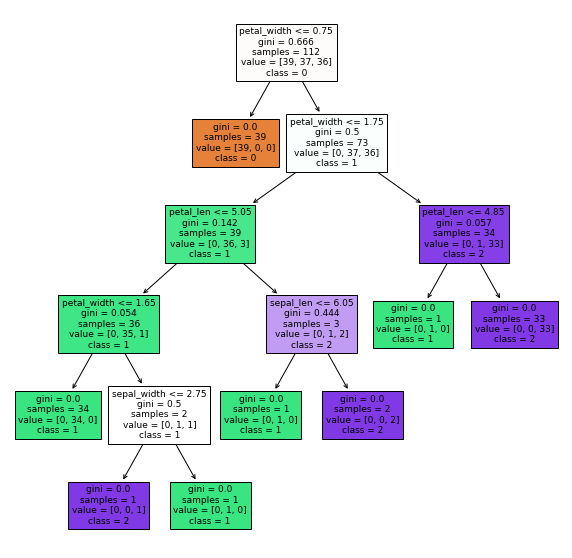

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

#### Decision Tree with Entropy with the objective of tackling the Overfiting probelm

In [ ]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=10)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [ ]:
mscore(dt2)

Training Score 0.9821428571428571
Testing Score 0.9210526315789473


In [ ]:
ypred_dt2 = dt2.predict(x_test)
print(ypred_dt2)

[0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 1 0 0 1 1 1 0 0
 0]


In [ ]:
eval_model(y_test,ypred_dt2)

[[11  0  0]
 [ 0 13  0]
 [ 0  3 11]]
Accuracy Score 0.9210526315789473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      1.00      0.90        13
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.94      0.92      0.92        38



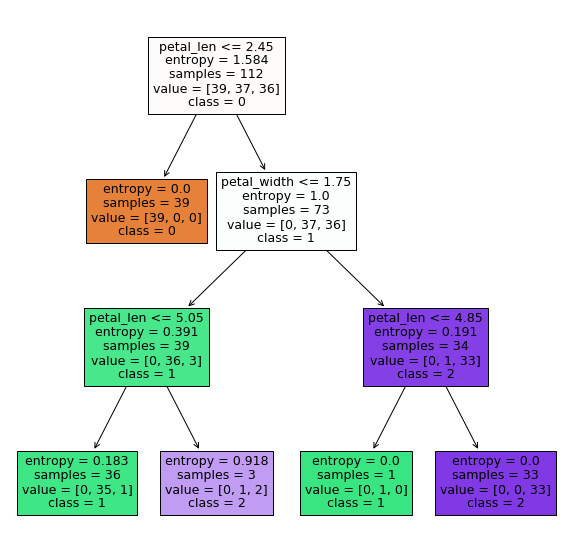

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dt2,feature_names=fn,class_names=cn,filled=True)
plt.show()